<a href="https://colab.research.google.com/github/Lalitha1704/machine_learning/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

# Set the figure size
rcParams['figure.figsize'] = 15, 6

# Ensure inline plotting for Jupyter Notebook
%matplotlib inline


In [4]:
# Load the CSV file
data = pd.read_csv('/content/zomato.csv')

# Display the first 5 rows of the dataset
print(data.head())

# Print data types of each column
print('\nData Types:')
print(data.dtypes)

         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1  2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2  2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3  2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4  2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  
0  694895290  
1  249723854  
2  240341900  
3  159793731  
4  117973089  

Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [5]:
# import pandas as pd
from datetime import datetime

# Date parsing function
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')

# Load the CSV file with date parsing
data = pd.read_csv('/content/zomato.csv', parse_dates=['Date'], index_col='Date')

# Display the first 5 rows of the dataset
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

               Volume  
Date                   
2021-07-23  694895290  
2021-07-26  249723854  
2021-07-27  240341900  
2021-07-28  159793731  
2021-07-29  117973089  


In [7]:
#check datatype of index
data.index

DatetimeIndex(['2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-08-02', '2021-08-03',
               '2021-08-04', '2021-08-05',
               ...
               '2024-01-24', '2024-01-25', '2024-01-29', '2024-01-30',
               '2024-01-31', '2024-02-01', '2024-02-02', '2024-02-05',
               '2024-02-06', '2024-02-07'],
              dtype='datetime64[ns]', name='Date', length=631, freq=None)

In [8]:
#convert to time series:
ts = data['Adj Close']
ts.head(10)

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
2021-07-30,133.500000
2021-08-02,139.699997
2021-08-03,139.399994
2021-08-04,138.399994


In [9]:
#1. Specific the index as a string constant:
ts['2021-07-23']

126.0

In [10]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2024, 1, 23)]

130.100006

In [11]:
#1. Specify the entire range:
ts['2021-07-23':'2024-1-23']

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2024-01-17,127.400002
2024-01-18,129.449997
2024-01-19,135.050003


In [12]:
#2. Use ':' if one of the indices is at ends:
ts[:'2023-07-28']

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2023-07-24,81.300003
2023-07-25,82.650002
2023-07-26,83.349998


In [13]:
ts['2021']

,Adj Close
Date,
2021-07-23,126.000000
2021-07-26,140.649994
2021-07-27,132.899994
2021-07-28,131.199997
2021-07-29,141.550003
...,...
2021-12-27,132.750000
2021-12-28,132.850006
2021-12-29,137.100006


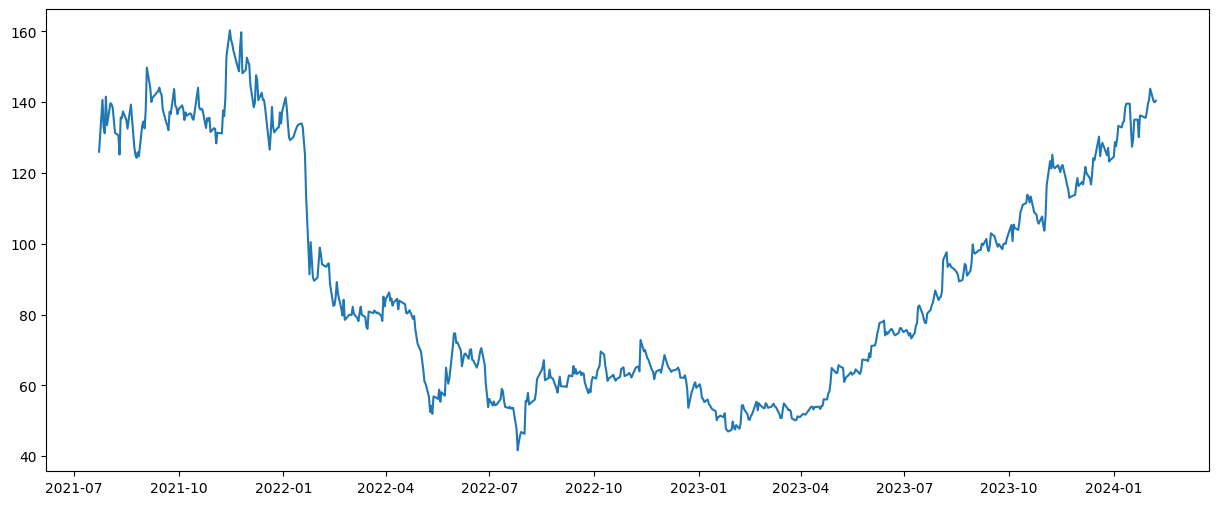

In [14]:
plt.plot(ts)

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

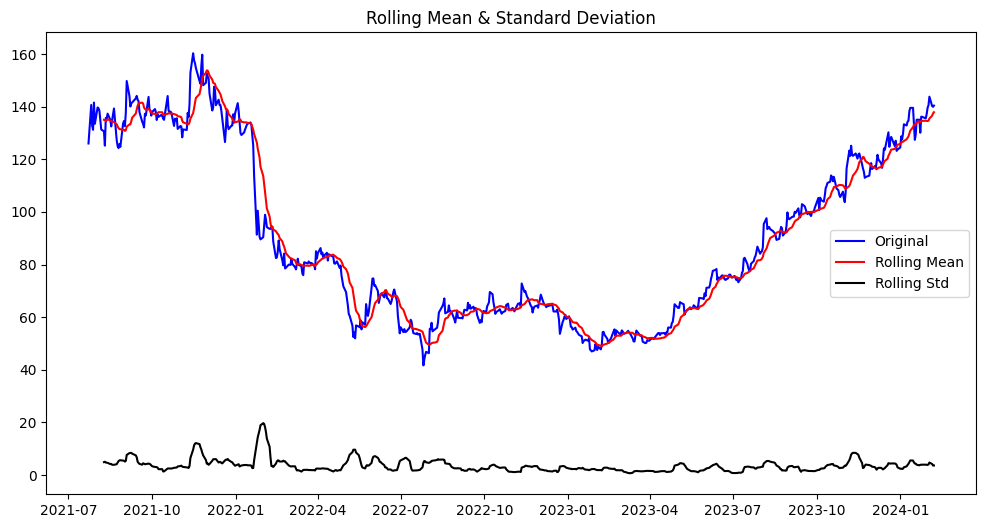

Results of Dickey-Fuller Test:
Test Statistic                  -0.956977
p-value                          0.768631
#Lags Used                       0.000000
Number of Observations Used    630.000000
Critical Value (1%)             -3.440772
Critical Value (5%)             -2.866139
Critical Value (10%)            -2.569219
dtype: float64


In [20]:
test_stationarity(ts)

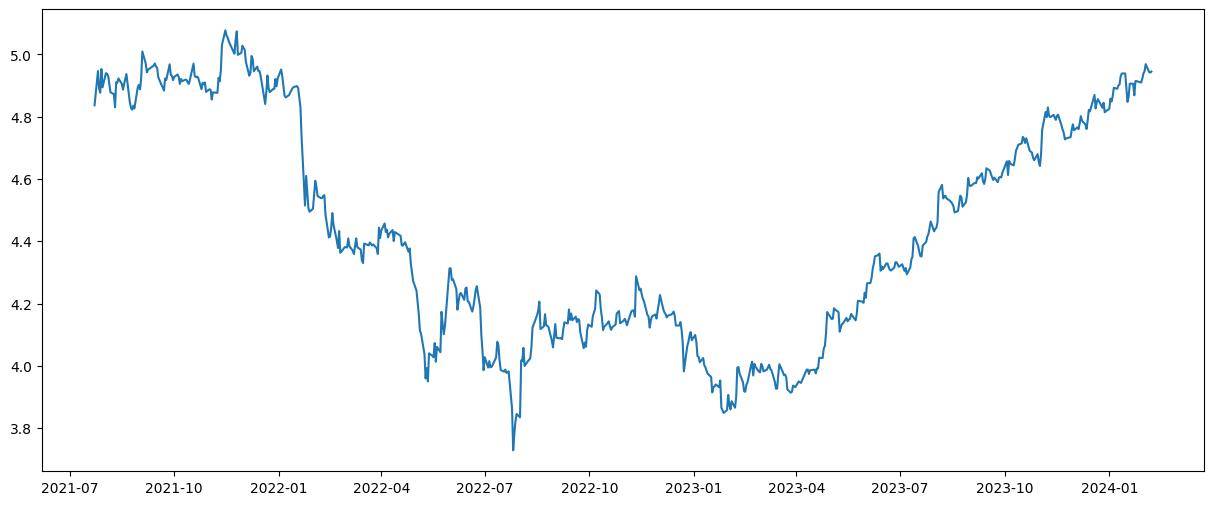

In [21]:
ts_log = np.log(ts)
plt.plot(ts_log)

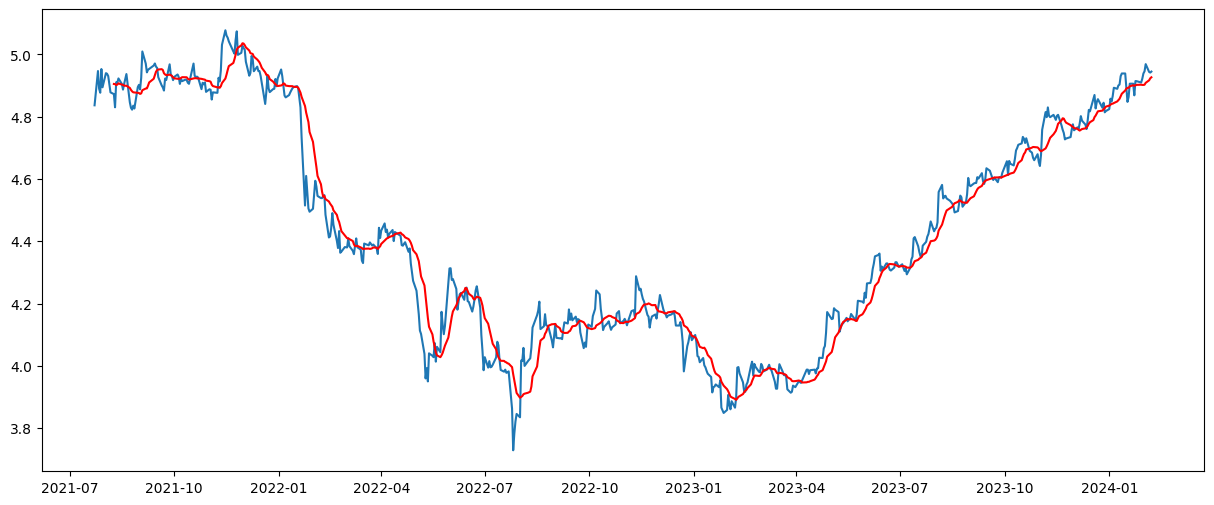

In [27]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [28]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,Adj Close
Date,
2021-07-23,NaN
2021-07-26,NaN
2021-07-27,NaN
2021-07-28,NaN
2021-07-29,NaN
2021-07-30,NaN
2021-08-02,NaN
2021-08-03,NaN
2021-08-04,NaN


In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

,Adj Close
Date,
2021-08-09,-0.032655
2021-08-10,-0.074351
2021-08-11,0.008831
2021-08-12,0.005772
2021-08-13,0.015884


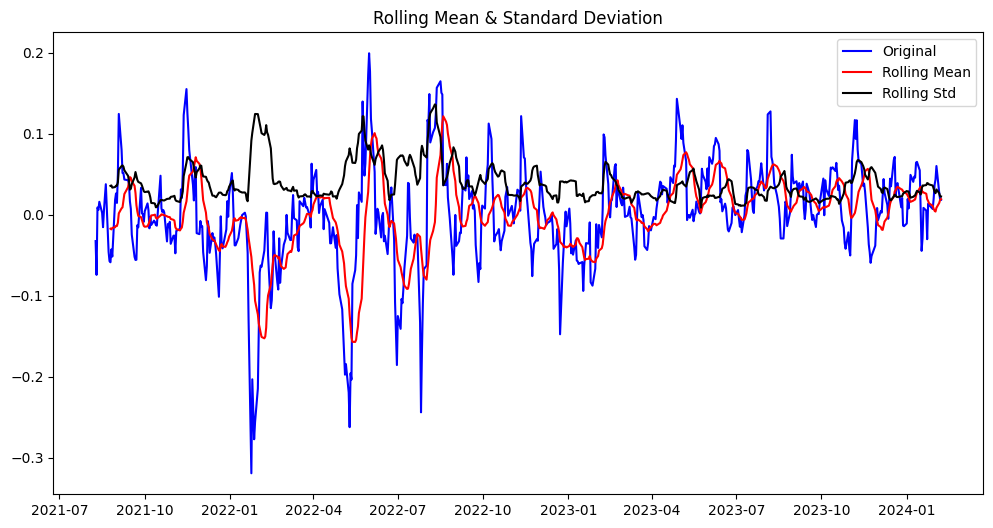

Results of Dickey-Fuller Test:
Test Statistic                -7.290871e+00
p-value                        1.418391e-10
#Lags Used                     2.000000e+00
Number of Observations Used    6.170000e+02
Critical Value (1%)           -3.440993e+00
Critical Value (5%)           -2.866236e+00
Critical Value (10%)          -2.569271e+00
dtype: float64


In [30]:
test_stationarity(ts_log_moving_avg_diff)

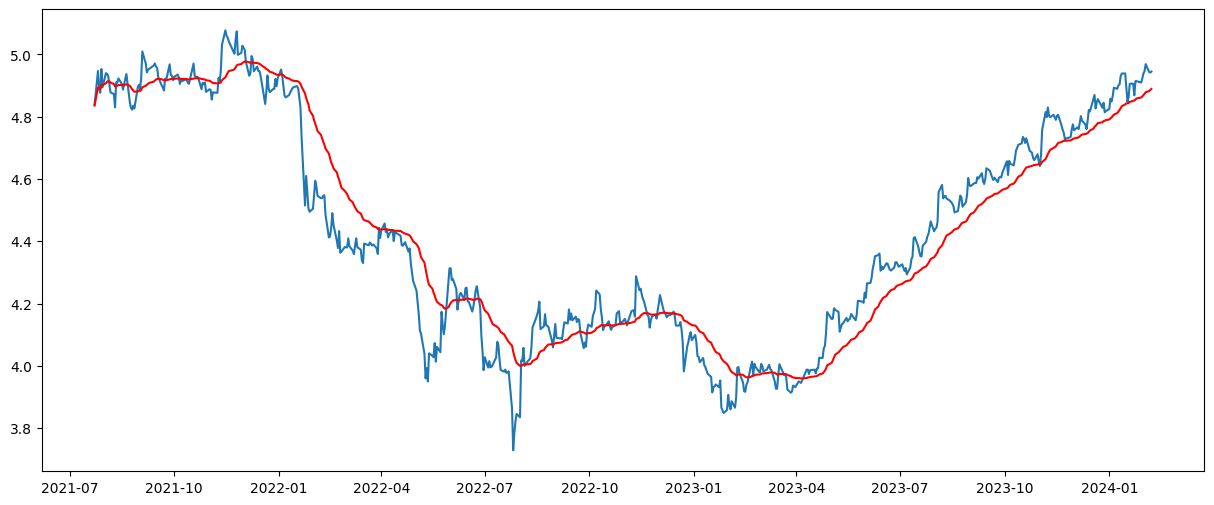

In [32]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

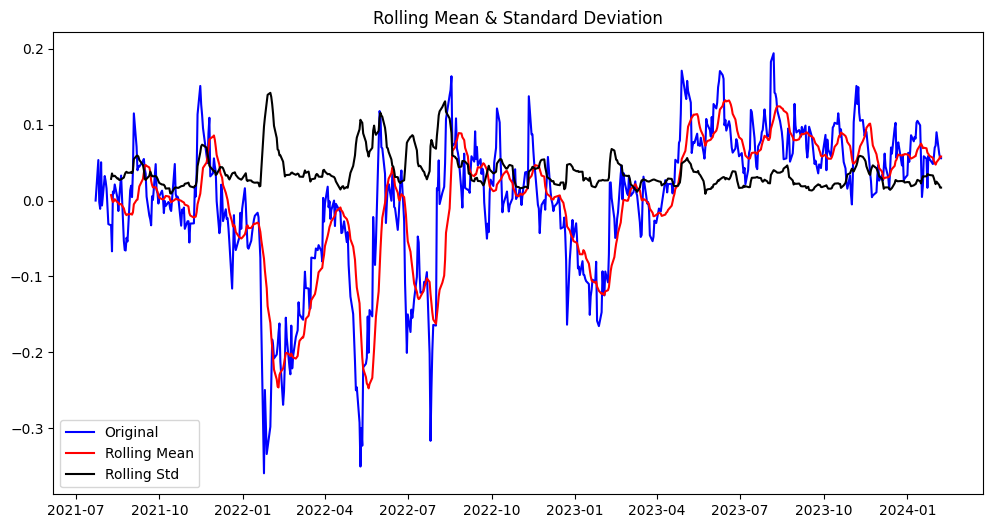

Results of Dickey-Fuller Test:
Test Statistic                  -4.390189
p-value                          0.000309
#Lags Used                       0.000000
Number of Observations Used    630.000000
Critical Value (1%)             -3.440772
Critical Value (5%)             -2.866139
Critical Value (10%)            -2.569219
dtype: float64


In [33]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

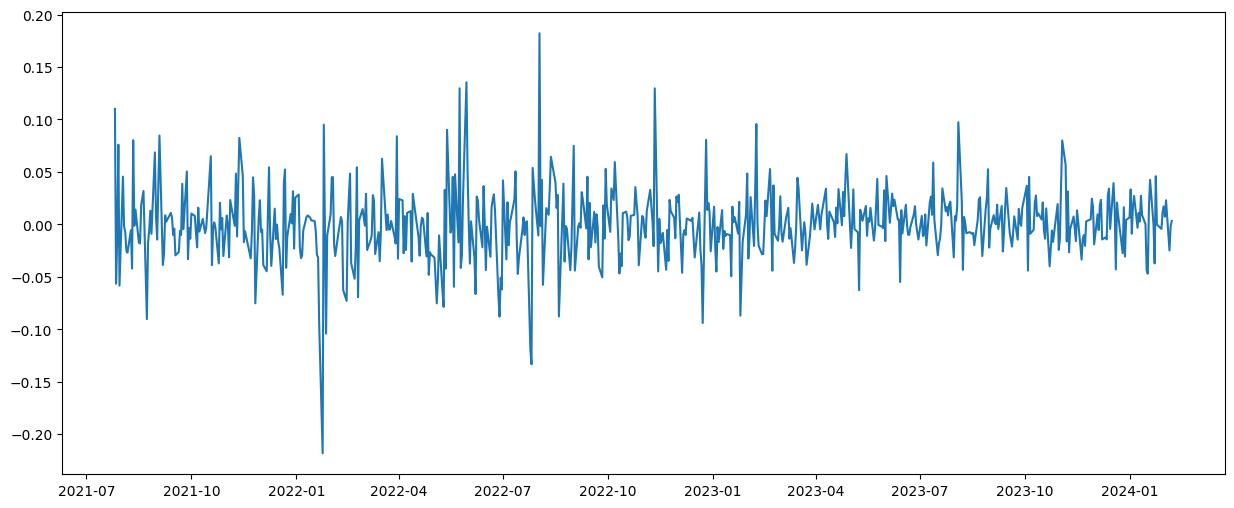

In [34]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

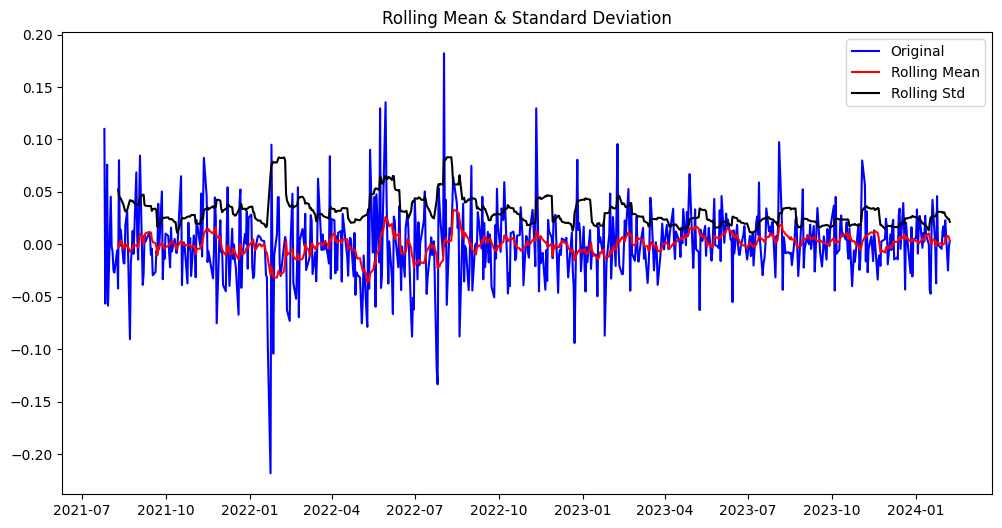

Results of Dickey-Fuller Test:
Test Statistic                 -25.399204
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    629.000000
Critical Value (1%)             -3.440789
Critical Value (5%)             -2.866146
Critical Value (10%)            -2.569223
dtype: float64


In [35]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

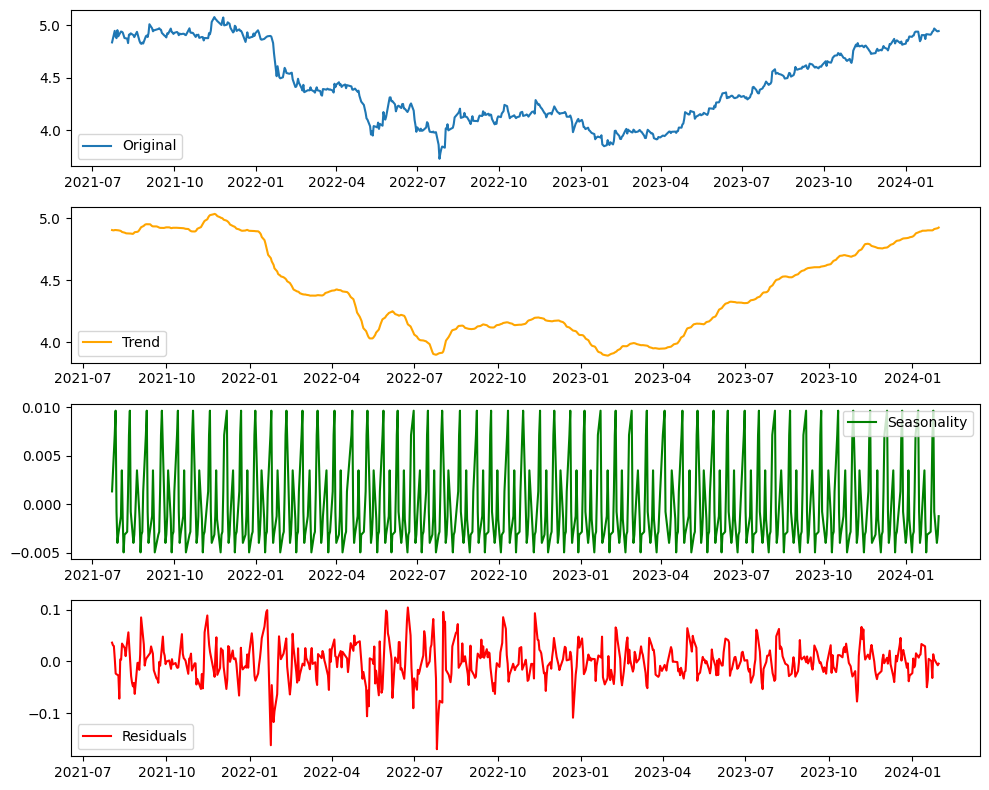

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_log, model='additive', period=12)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


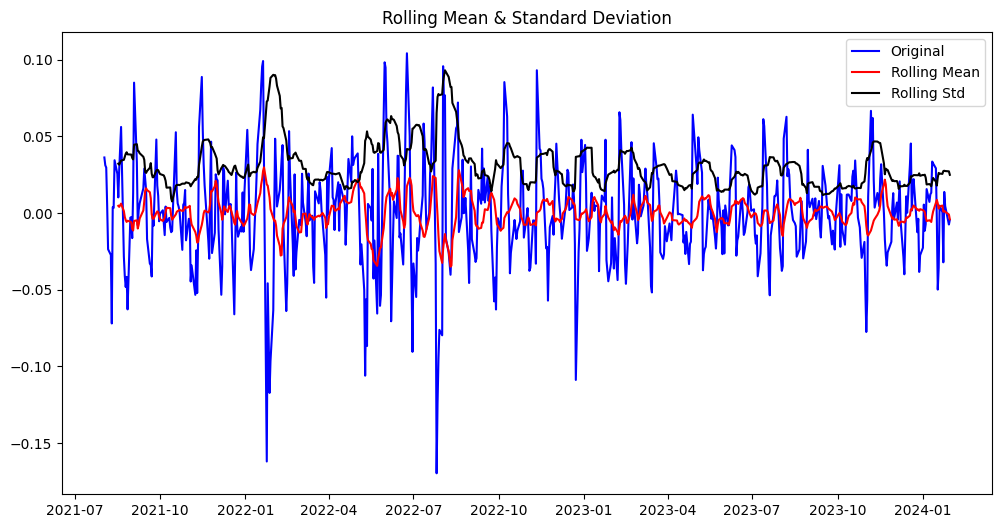

Results of Dickey-Fuller Test:
Test Statistic                -1.036392e+01
p-value                        2.357250e-18
#Lags Used                     1.300000e+01
Number of Observations Used    6.050000e+02
Critical Value (1%)           -3.441205e+00
Critical Value (5%)           -2.866329e+00
Critical Value (10%)          -2.569320e+00
dtype: float64


In [38]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [39]:
from statsmodels.tsa.arima_model import ARIMA

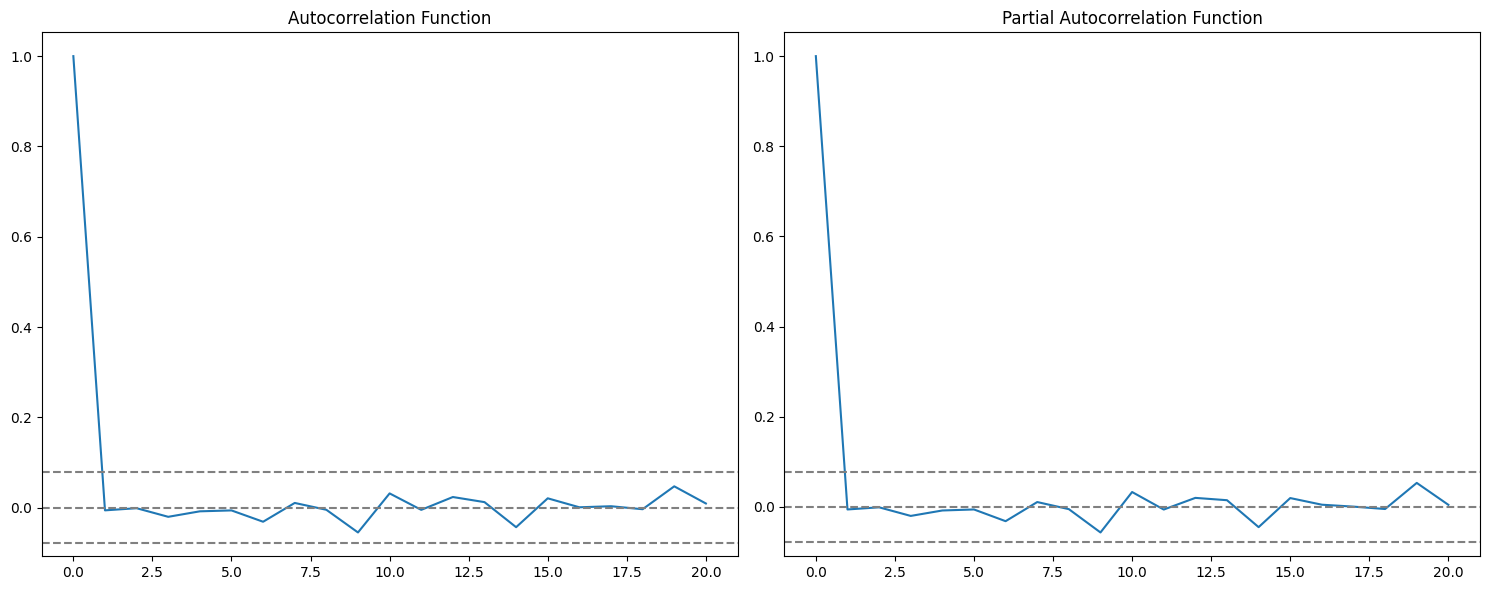

In [40]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


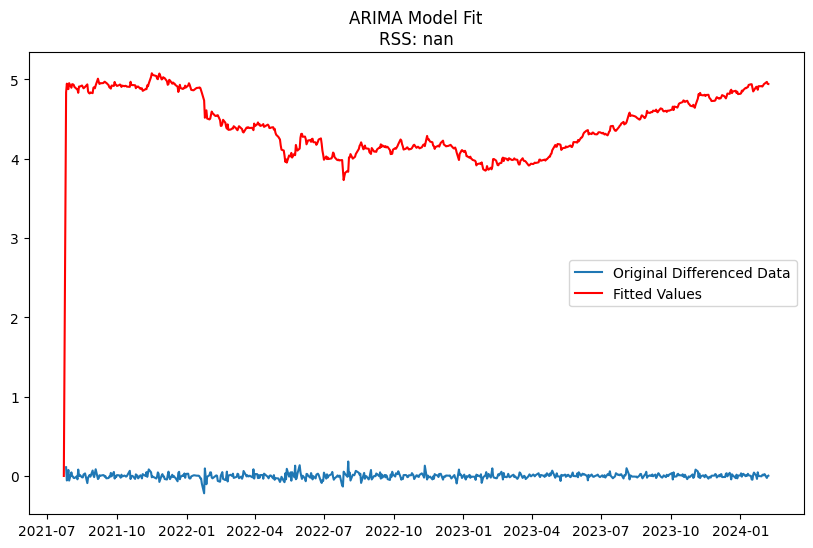

In [43]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit()

# Plot original differenced data
plt.figure(figsize=(10, 6))
plt.plot(ts_log_diff, label='Original Differenced Data')
plt.plot(results_AR.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit\nRSS: %.4f' % sum((results_AR.fittedvalues - ts_log_diff) ** 2))
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


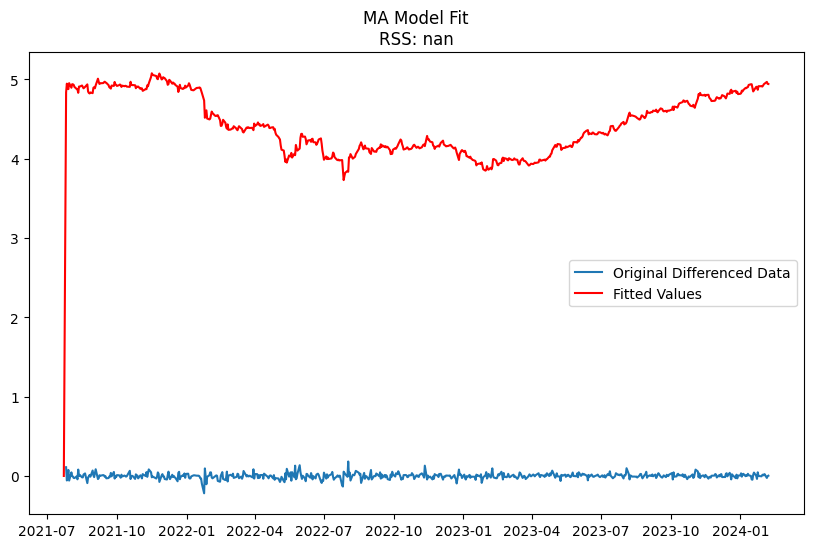

In [45]:
# Fit ARIMA model (0, 1, 2)
model = ARIMA(ts_log, order=(0, 1, 2))
results_MA = model.fit()

# Plot original differenced data and fitted values
plt.figure(figsize=(10, 6))
plt.plot(ts_log_diff, label='Original Differenced Data')
plt.plot(results_MA.fittedvalues, color='red', label='Fitted Values')
plt.title('MA Model Fit\nRSS: %.4f' % sum((results_MA.fittedvalues - ts_log_diff) ** 2))
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: nan')

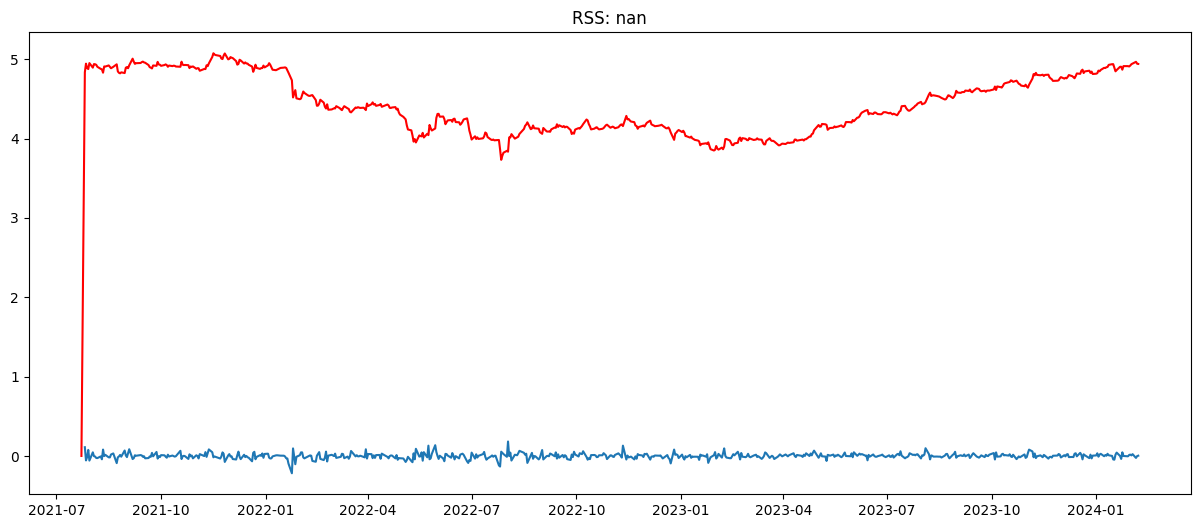

In [47]:
model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2021-07-23    0.000000
2021-07-26    4.836282
2021-07-27    4.944820
2021-07-28    4.889426
2021-07-29    4.876804
dtype: float64


In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2021-07-23     0.000000
2021-07-26     4.836282
2021-07-27     9.781102
2021-07-28    14.670528
2021-07-29    19.547332
dtype: float64


In [52]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

,0
Date,
2021-07-23,4.836282
2021-07-26,9.672564
2021-07-27,14.617384
2021-07-28,19.506810
2021-07-29,24.383614


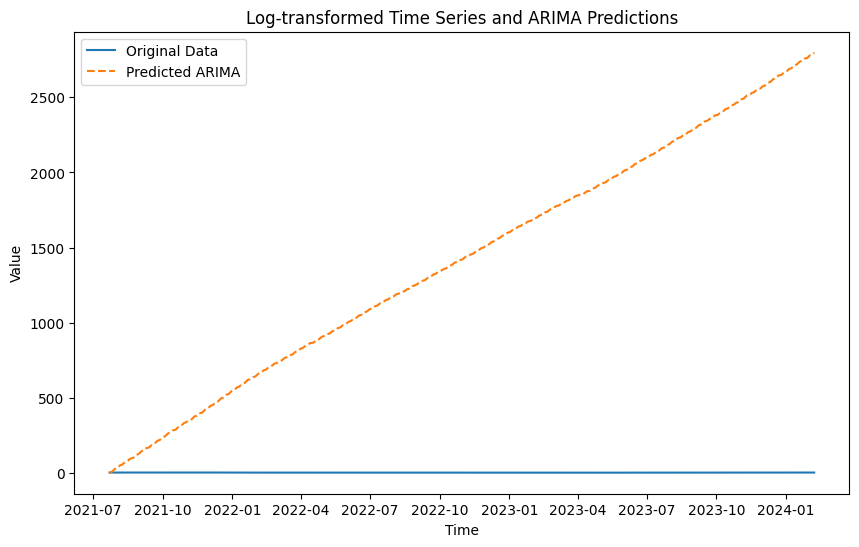

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ts_log, label='Original Data')
plt.plot(predictions_ARIMA_log, label='Predicted ARIMA', linestyle='--')
plt.legend()
plt.title('Log-transformed Time Series and ARIMA Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

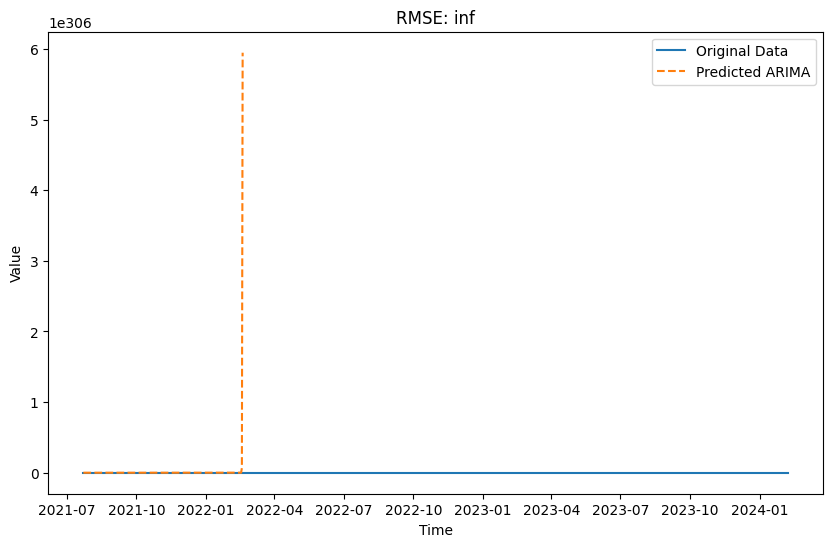

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming ts is the original time series and predictions_ARIMA_log is already defined
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Plot the original time series and the predictions
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original Data')
plt.plot(predictions_ARIMA, label='Predicted ARIMA', linestyle='--')
plt.title('RMSE: %.4f' % np.sqrt(np.sum((predictions_ARIMA - ts)**2) / len(ts)))
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()